<a href="https://colab.research.google.com/github/Tsatthienmach/AiSummerCode/blob/master/week4/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import random
import matplotlib.pyplot as plt


In [22]:
# Clone the entire repo.
!git clone -l -s https://github.com/Tsatthienmach/AiSummerCode.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 31 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.
/content/cloned-repo/cloned-repo
_config.yml  documentations  README.md	week2  week4


In [23]:
data = pd.read_csv('/content/cloned-repo/week4/data.csv'  , header=None )
print(data)

      0     1
0  6.71  9.12
1  1.20  2.43
2  1.86  2.91
3  2.09  3.41
4  3.05  4.71
5  4.69  5.94
6  3.57  5.40
7  5.55  7.04
8  2.39  3.38
9  3.94  5.29


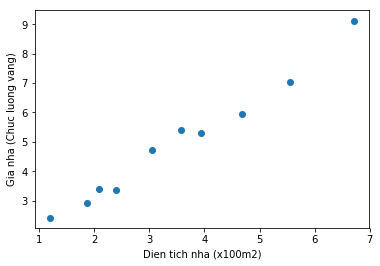

In [24]:
data_len = len(data)
plt.scatter(data[0],data[1] , marker = 'o')
plt.xlabel('Dien tich nha (x100m2)')
plt.ylabel('Gia nha (Chuc luong vang)')
plt.show()

In [25]:
def load_data():
    file = open('/content/cloned-repo/week4/data.csv' , 'r')
    lines = file.readlines()
    file.close()
    areas =[]
    prices = []
    for i in range(len(lines)):
        string = lines[i].split(',')
        areas.append(float(string[0]))
        prices.append(float(string[1]))
    return areas , prices
areas , prices = load_data()
print(areas)

[6.71, 1.2, 1.86, 2.09, 3.05, 4.69, 3.57, 5.55, 2.39, 3.94]


In [0]:
def generate_random_value(bound = 100):
    return (random.random()*2-1)*bound

In [0]:
def compute_loss(individual):
    a = individual[0]
    b = individual[1]
    estimated_prices = [a*x + b for x in areas]
    estimated_prices = [abs(x) for x in estimated_prices]
    losses = [abs(y_est - y_gt) for y_est , y_gt in zip(estimated_prices, prices)]
    return sum(losses)  

In [0]:
def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1/(loss+1)
    return fitness

In [0]:
def create_individual():
     return [generate_random_value() for _ in range(n)]

In [0]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_n = individual1.copy()
    individual2_n = individual2.copy()
    for i in range(n):
        if random.random() < crossover_rate :
            individual1_n[i] = individual2[i]
            individual2_n[i] = individual1[i]
    return individual1_n , individual2_n

In [0]:
def mutate(individual , mutate_rate = 0.05):
    individual_n = individual.copy()
    for i in range (n):
        if random.random() < mutate_rate:
            individual_n[i] = generate_random_value()
    return individual_n 

In [0]:
def selection(sorted_old_population):
    index1 = random.randint(0,m-1)
    while True:
        index2 = random.randint(0,m-1)
        if index2 != index1 :
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [0]:
def create_new_population(old_population , elitism = 2  , gen = 1):
    sorted_population = sorted(old_population , key = compute_fitness)
    # print(sorted_population)
    if gen%1 == 0:
        losses.append(compute_loss(sorted_population[m-1]))
        print('Best loss= ', compute_loss(sorted_population[m-1]))

    new_population = []

    while len(new_population) < m - elitism:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population)
        # crossover
        individual_n1, individual_n2 = crossover(individual_s1 , individual_s2)
        # mutate
        individual_c1 = mutate(individual_n1)
        individual_c2 = mutate(individual_n2)
        new_population.append(individual_c1)
        new_population.append(individual_c2)
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy()) 
    return new_population

In [0]:
n = 2 # size of individual
m = 100 # size of population
n_generations = 100 # number of generations

Best loss=  99.38128587273678
Best loss=  99.38128587273678
Best loss=  99.38128587273678
Best loss=  35.27081233892612
Best loss=  35.27081233892612
Best loss=  29.630759220376962
Best loss=  29.630759220376962
Best loss=  29.630759220376962
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  24.572231955625107
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.96877607815621
Best loss=  16.968776078156

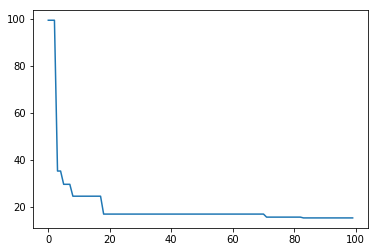

In [35]:
population = [create_individual() for _ in range(m)]
losses = []
for i in range(n_generations):
    m = len(population)
    population = create_new_population(population, 2,i )

import matplotlib.pyplot as plt 
plt.plot([i for i in range(n_generations)] , losses)
plt.show()